In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
cd ../TileEM/

/home/jlee782/crowd-seg/analysis/TileEM


In [10]:
cd ../pixel_em/

/home/jlee782/crowd-seg/analysis/TileEM/pixel_em


In [5]:
import pandas as pd

In [47]:
PR_tbl = pd.read_csv("full_PR_table.csv")

In [15]:
PR_tbl.mean()

num_workers     12.333333
sample_num       2.933333
objid           24.000000
MV_precision     0.923356
MV_recall        0.927232
EM_precision     0.922656
EM_recall        0.928828
dtype: float64

In [6]:
PR_pixelEM = pd.read_csv("pixel_em/full_PRJ_table.csv")

In [8]:
thres_lst = list(set(PR_pixelEM.thresh))

In [24]:
all_Pixel_PRJ=[]
for thresh in sorted(thres_lst):
    print "Thres:",thresh

    PR_pixelEMi =PR_pixelEM[(PR_pixelEM["thresh"]==thresh)]
    PixelMVP= PR_pixelEMi["MV_precision"].mean()
    PixelMVR= PR_pixelEMi["MV_recall"].mean()
    PixelMVJ= PR_pixelEMi["MV_jaccard"].mean()
    PixelEMP= PR_pixelEMi["EM_precision"].mean()
    PixelEMR= PR_pixelEMi["EM_recall"].mean()
    PixelEMJ= PR_pixelEMi["EM_jaccard"].mean()

    print len(PR_pixelEMi["EM_recall"])
    print PixelEMP,PixelEMR,PixelEMJ
    all_Pixel_PRJ.append([PixelMVP,PixelMVR,PixelMVJ,PixelEMP,PixelEMR,PixelEMJ])

Thres: -10
1222
0.866425912641 0.957829363714 0.831090643858
Thres: -4
985
0.909515961116 0.944639533937 0.861866607672
Thres: -2
984
0.922038682009 0.934305505907 0.864281256466
Thres: 0
984
0.926201771312 0.929775840683 0.864045518784
Thres: 2
981
0.929589060321 0.925162294508 0.862827805764
Thres: 4
981
0.938466160436 0.910917913774 0.857454938425
Thres: 10
1222
0.923468828978 0.862938978667 0.819540731715


In [34]:
data = pd.DataFrame(all_Pixel_PRJ,index=sorted(thres_lst),columns=PR_pixelEMi.keys()[4:])

In [35]:
data

,MV_precision,MV_recall,MV_jaccard,EM_precision,EM_recall,EM_jaccard
-10,0.923721,0.928008,0.859585,0.866426,0.957829,0.831091
-4,0.927078,0.929185,0.864005,0.909516,0.944640,0.861867
-2,0.927019,0.929120,0.863888,0.922039,0.934306,0.864281
0,0.927019,0.929120,0.863888,0.926202,0.929776,0.864046
2,0.926853,0.929142,0.863761,0.929589,0.925162,0.862828
4,0.926853,0.929142,0.863761,0.938466,0.910918,0.857455
10,0.923721,0.928008,0.859585,0.923469,0.862939,0.819541


# Verify tiles are correct

In [36]:
import pickle as pkl 

import shapely

In [44]:
def plot_coords(obj, color='red', reverse_xy=False, linestyle='-',lw=0, fill_color="", hatch='', show=False, invert_y=False):
    #Plot shapely polygon coord
    if type(obj) != shapely.geometry.MultiPolygon and type(obj) != list:
        obj = [obj]

    for ob in obj:
        if ob.exterior is None:
            print 'Plotting bug: exterior is None (potentially a 0 area tile). Ignoring and continuing...'
            continue
        if reverse_xy:
            x, y = ob.exterior.xy
        else:
            y, x = ob.exterior.xy
        plt.plot(x, y, linestyle, linewidth=lw, color=color, zorder=1)
        if fill_color != "":
            plt.fill_between(x, y, facecolor=fill_color, hatch=hatch, linewidth=lw, alpha=0.5)
    if invert_y:
        plt.gca().invert_yaxis()

In [50]:
def visualizeTilesSeparate(tiles,colorful=True):
#     plt.figure()
    colors=cm.rainbow(np.linspace(0,1,len(tiles)))
    for t,i in zip(tiles,range(len(tiles))):
#         plt.figure()
        if colorful:
            c = colors[i]
        else:
            #c="lime"
            c="blue"
        if type(t)==shapely.geometry.polygon.Polygon:
            # plot_coords(t,color=c,reverse_xy=True,fill_color=c)
            plot_coords(t,color=c,fill_color=c,reverse_xy=True,invert_y=True)
            # plot_coords(t,color=c,lw=1)
        elif type(t)==shapely.geometry.MultiPolygon or type(t)==shapely.geometry.collection:
            for region in t:
                if type(t)!=shapely.geometry.LineString:
                    # plot_coords(region,color=c,reverse_xy=True,fill_color=c)
                    plot_coords(region,color=c,fill_color=c,reverse_xy=True,invert_y=True)
                    # plot_coords(region,color=c,lw=1)
    #xylocs of the largest tile for estimating the obj size
    xlocs,ylocs = tiles[np.argmax([t.area for t in tiles])].exterior.coords.xy

/home/jlee782/.local/lib/python2.7/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


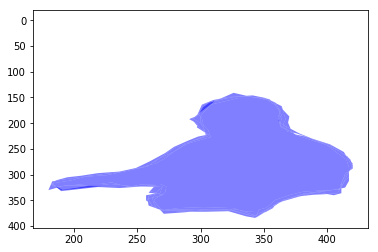

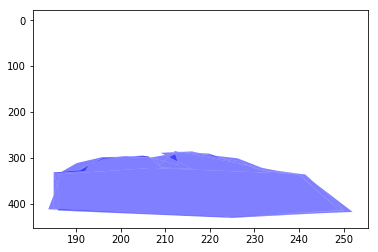

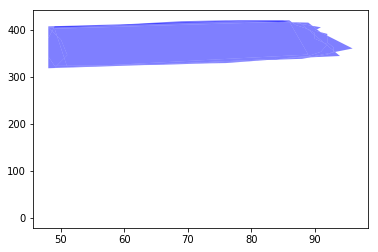

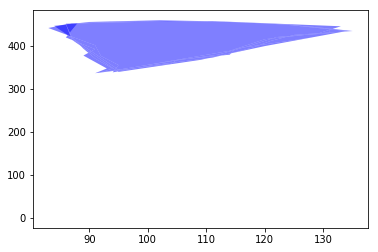

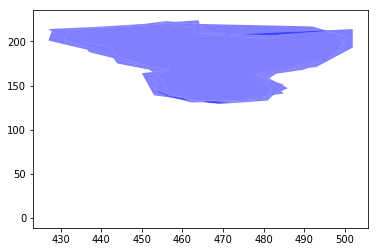

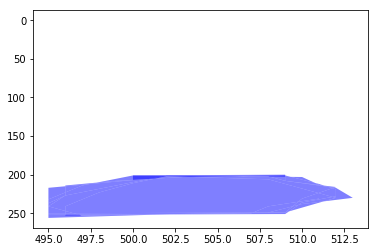

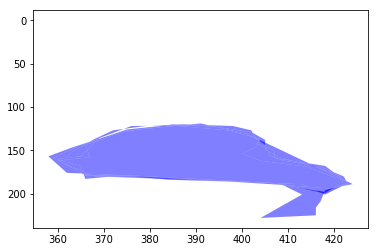

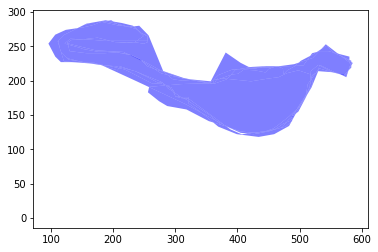

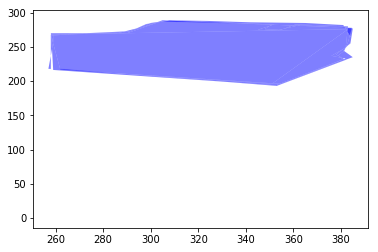

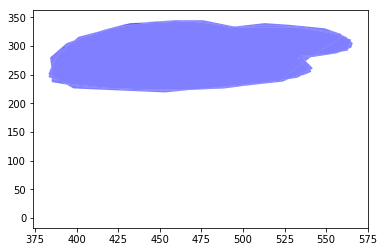

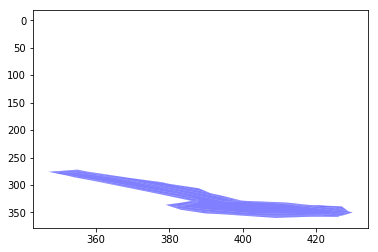

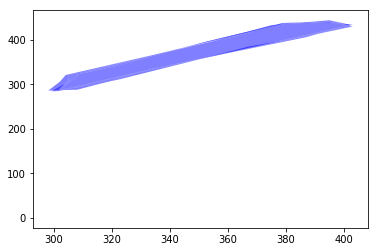

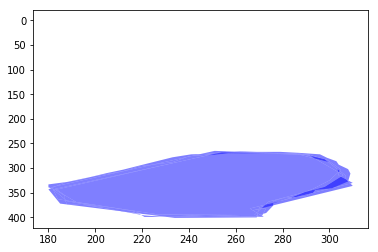

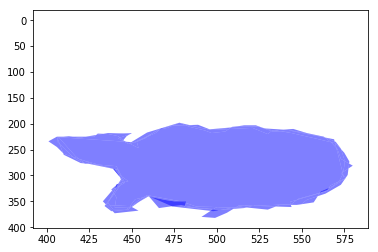

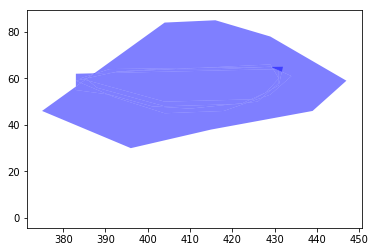

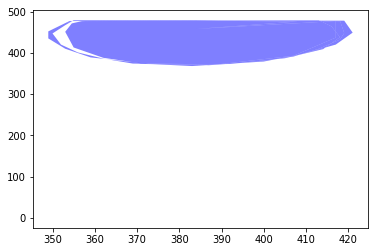

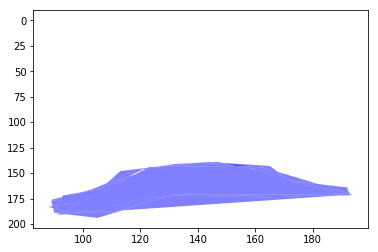

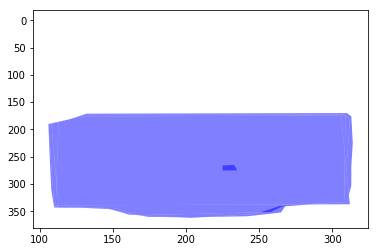

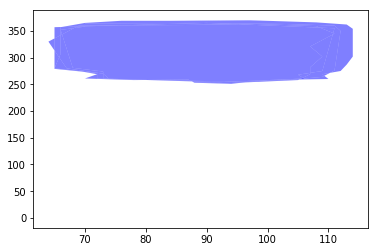

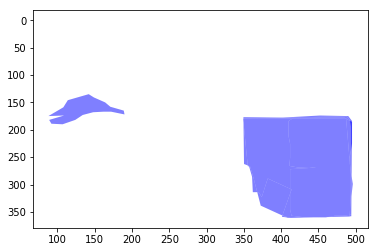

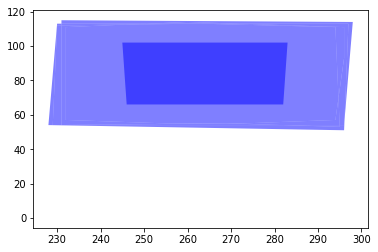

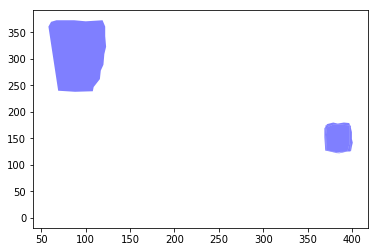

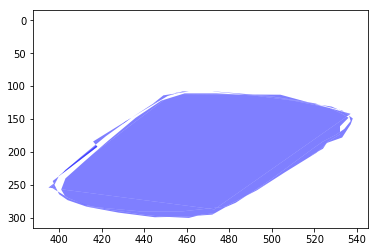

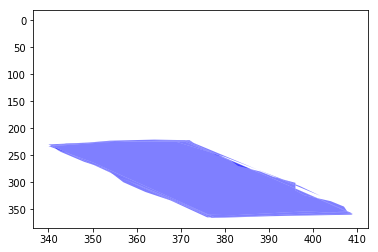

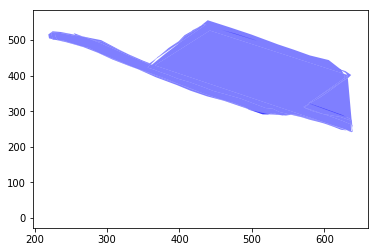

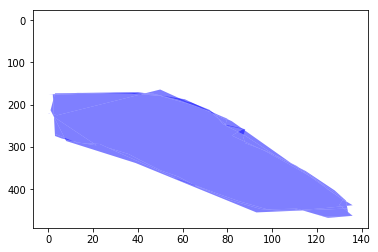

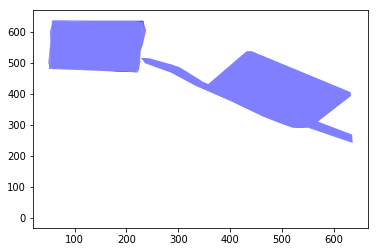

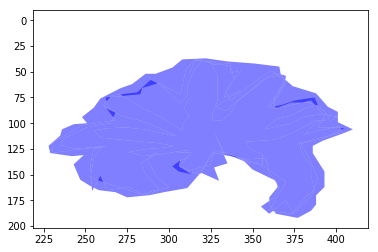

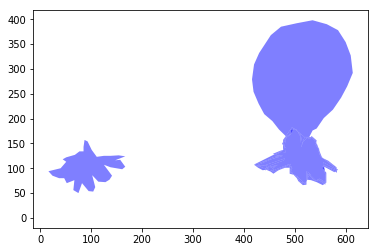

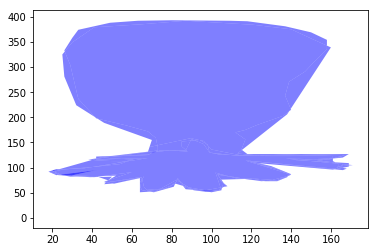

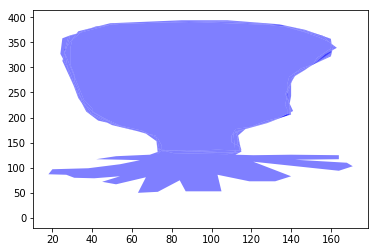

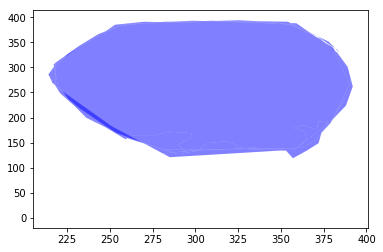

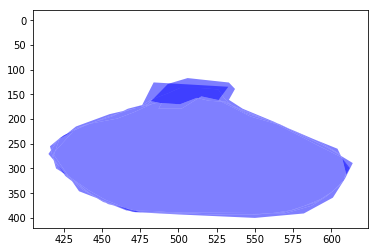

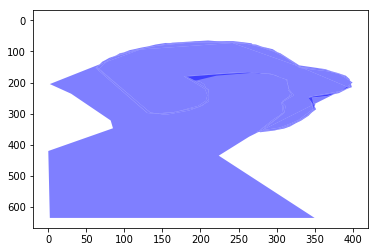

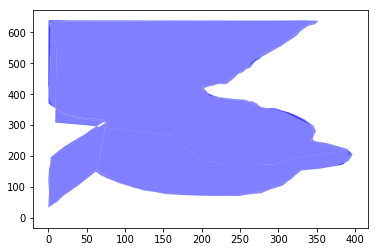

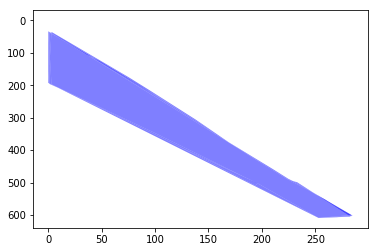

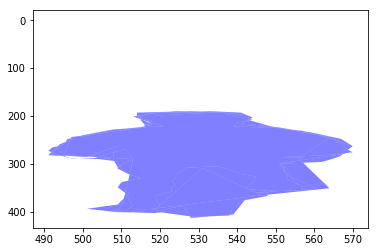

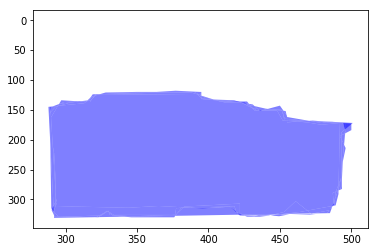

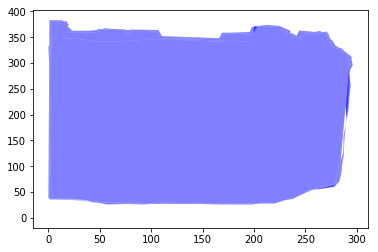

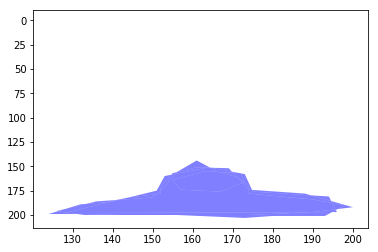

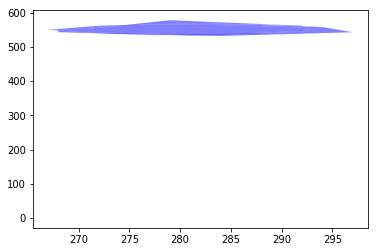

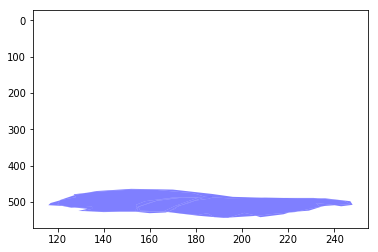

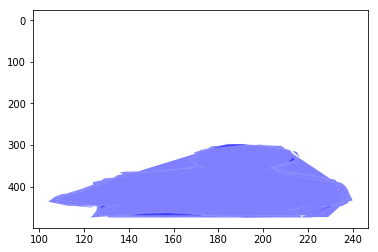

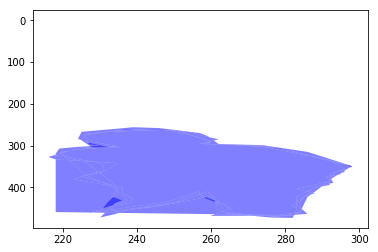

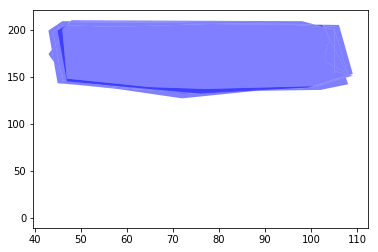

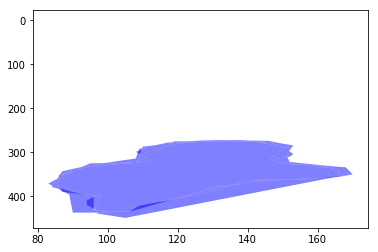

In [53]:
for objid in range(1,47):
    tiles = pkl.load(open("uniqueTiles/5workers_rand8/vtiles{}.pkl".format(objid)))
    plt.figure()
    visualizeTilesSeparate(tiles,colorful=False)

205
92
58
71
113
46
46
101
69
110
82
74
134
166
40
47
90
93
58
29
35
39
62
47
87
92
41
426
206
171
163
109
94
177
136
74
142
133
111
84
41
44
217
200
54
125


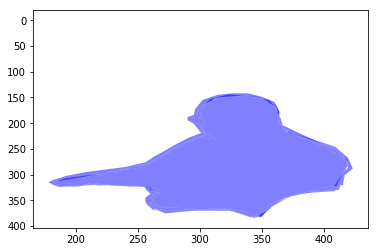

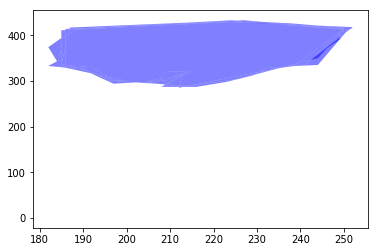

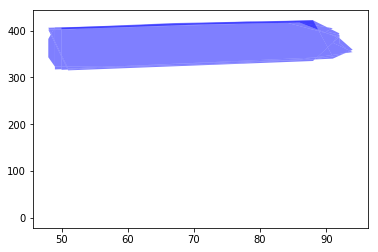

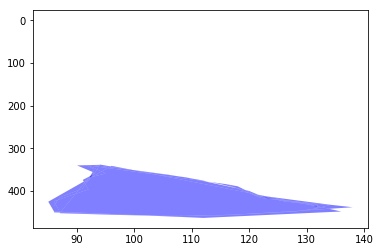

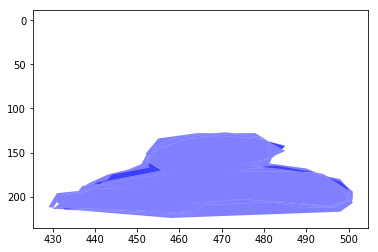

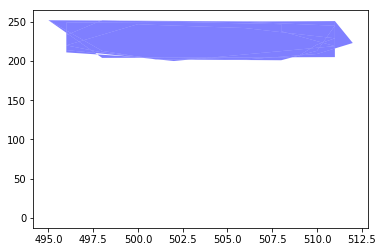

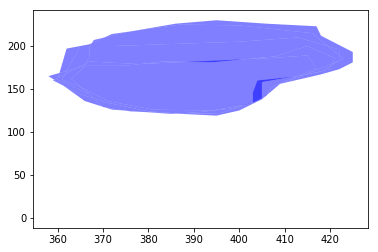

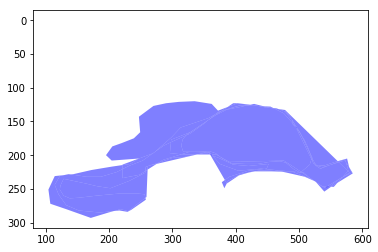

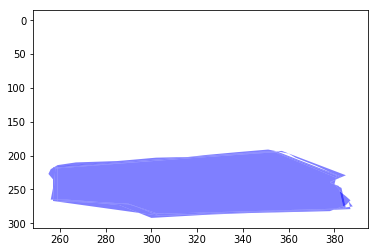

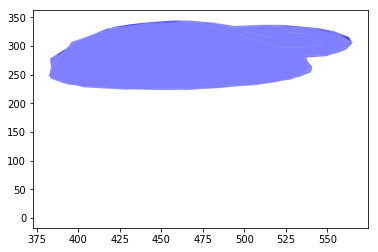

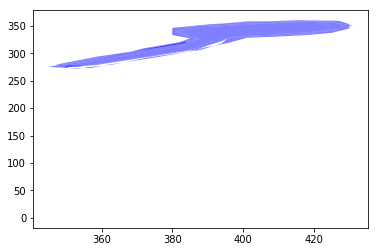

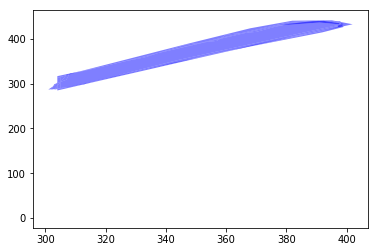

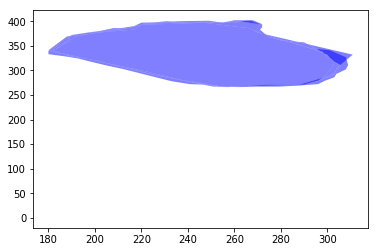

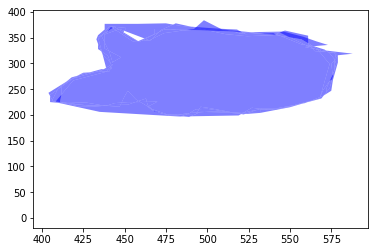

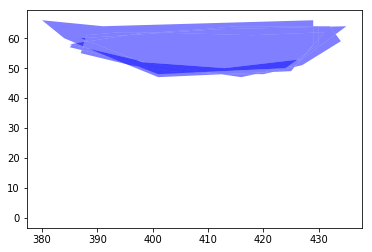

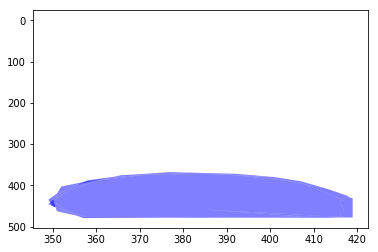

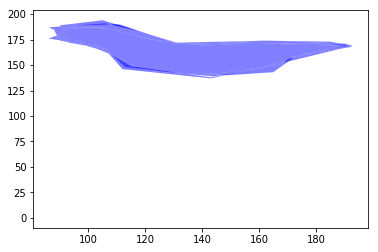

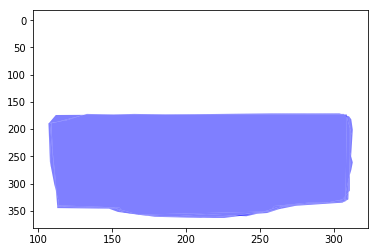

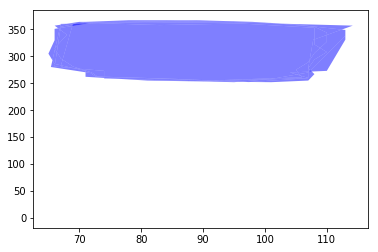

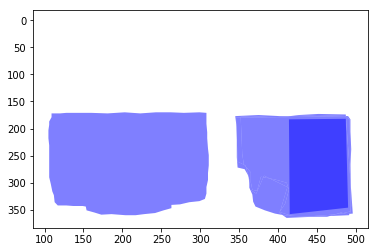

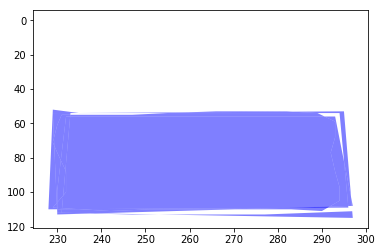

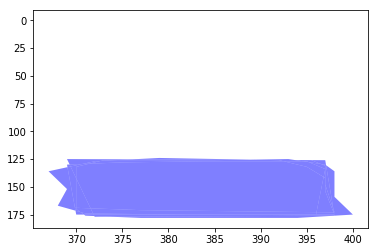

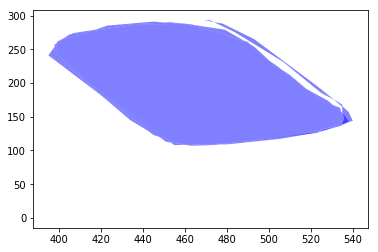

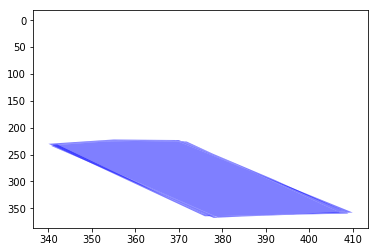

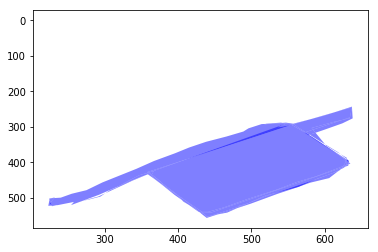

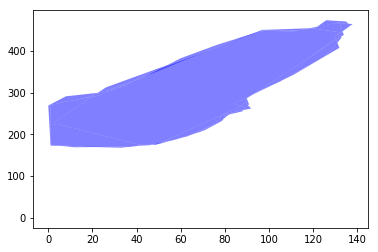

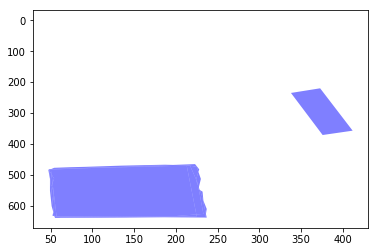

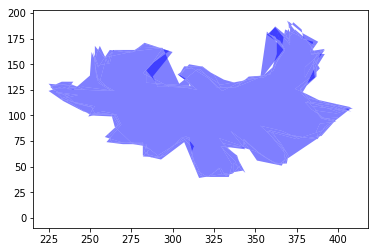

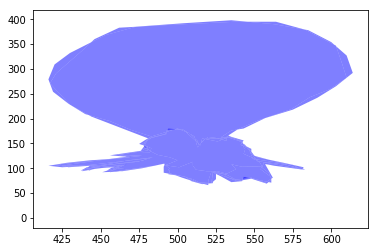

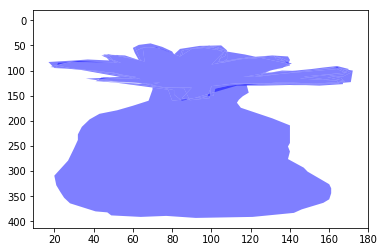

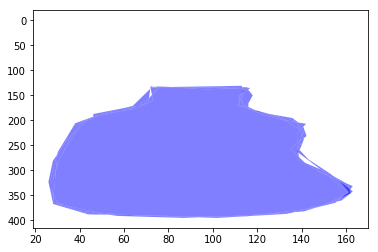

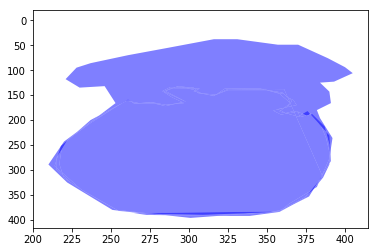

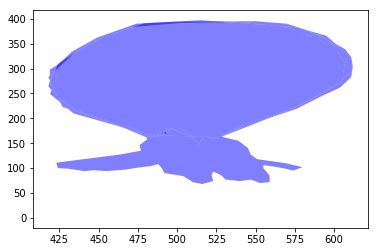

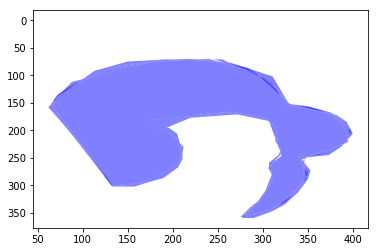

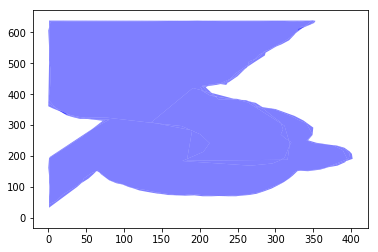

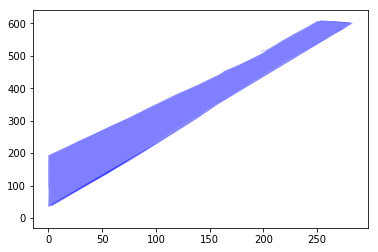

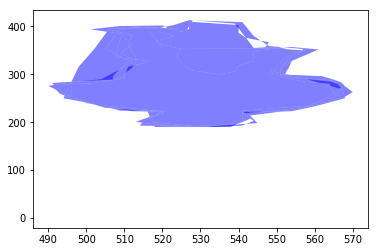

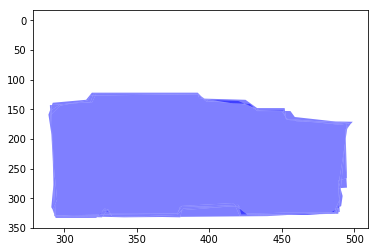

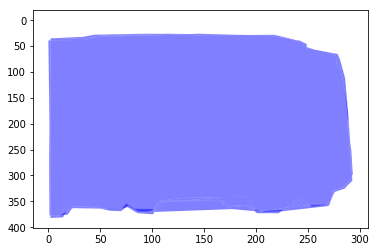

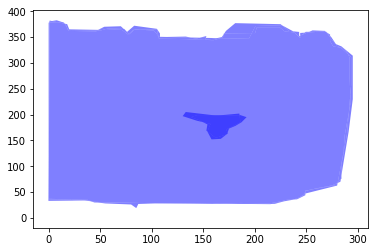

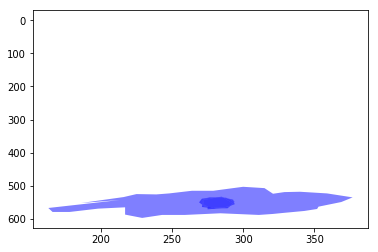

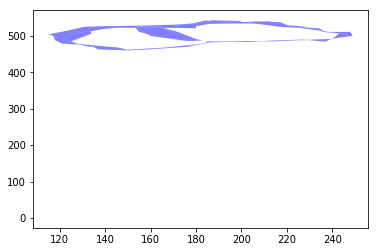

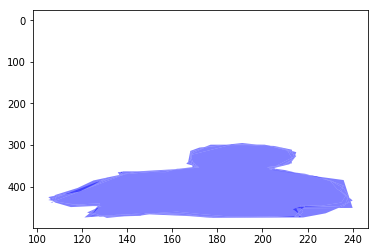

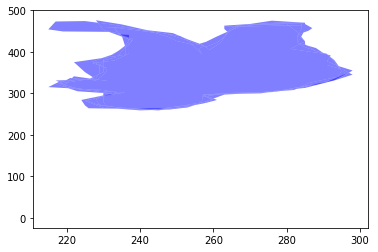

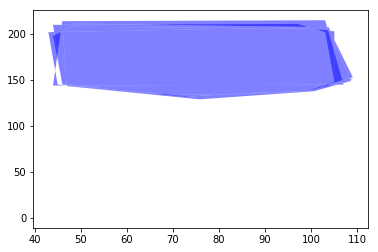

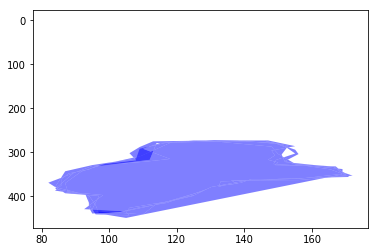

In [54]:
for objid in range(1,47):
    tiles = pkl.load(open("uniqueTiles/5workers_rand2/vtiles{}.pkl".format(objid)))
    plt.figure()
    print len(tiles)
    visualizeTilesSeparate(tiles,colorful=False)

In [56]:
workers = pkl.load(open("uniqueTiles/5workers_rand2/worker{}.pkl".format(objid)))

In [57]:
workers

[159, 181, 193, 225, 169]

In [58]:
objid=1
workers = pkl.load(open("uniqueTiles/5workers_rand2/worker{}.pkl".format(objid)))

In [59]:
workers

[219, 223, 238, 156, 114]

In [69]:
from BB2UniqueTile import * 

In [68]:
objid=1
indMat = pkl.load(open("uniqueTiles/20worker_rand0/indMat{}.pkl".format(objid)))

Check that there are no all-zero rows in indicator matrix: True
Check that there are no all-zero columns in indicator matrix: True


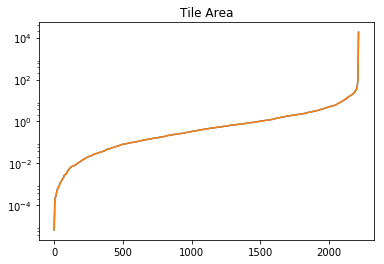

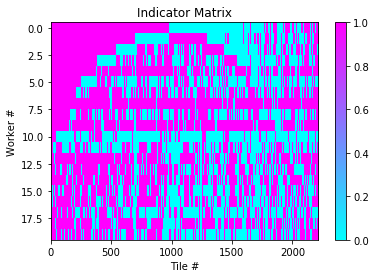

In [70]:
sanity_check(indMat,PLOT=True)